# Chapter 7_Keras_ Practice with  kaggle compation example, part1

# Typical Kaggle Competition

A typical Kaggle competition will have several components.  Consider the Titanic tutorial:

* [Competition Summary Page](https://www.kaggle.com/c/titanic)
* [Data Page](https://www.kaggle.com/c/titanic/data)
* [Evaluation Description Page](https://www.kaggle.com/c/titanic/details/evaluation)
* [Leaderboard](https://www.kaggle.com/c/titanic/leaderboard)

# Select Kaggle Competitions

There have been many interesting competitions on Kaggle, these are some of my favorites.

## Predictive Modeling

* [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge)
* [Galaxy Zoo - The Galaxy Challenge](https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge)
* [Practice Fusion Diabetes Classification](https://www.kaggle.com/c/pf2012-diabetes)
* [Predicting a Biological Response](https://www.kaggle.com/c/bioresponse)

## Computer Vision

* [Diabetic Retinopathy Detection](https://www.kaggle.com/c/diabetic-retinopathy-detection)
* [Cats vs Dogs](https://www.kaggle.com/c/dogs-vs-cats)
* [State Farm Distracted Driver Detection](https://www.kaggle.com/c/state-farm-distracted-driver-detection)

## Time Series

* [The Marinexplore and Cornell University Whale Detection Challenge](https://www.kaggle.com/c/whale-detection-challenge)

## Other

* [Helping Santa's Helpers](https://www.kaggle.com/c/helping-santas-helpers)

<font size=4 color="#A52A2A"><b>First _</b> Iris as a Kaggle Competition </font>

## data:

If the Iris data were used as a Kaggle, you would be given the following three files:

* [kaggle_iris_test.csv](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/data/kaggle_iris_test.csv) - The data that Kaggle will evaluate you on.  Contains only input, you must provide answers.  (contains x)
* [kaggle_iris_train.csv](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/data/kaggle_iris_train.csv) - The data that you will use to train. (contains x and y)
* [kaggle_iris_sample.csv](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/data/kaggle_iris_sample.csv) - A sample submission for Kaggle. (contains x and y)

Important features of the Kaggle iris files (that differ from how we've previously seen files):

* The iris species is already index encoded.
* Your training data is in a separate file.
* You will load the test data to generate a submission file.

## load data

In [1]:
import pandas as pd

In [134]:
train_iris = pd.read_csv("data/Chapter7/kaggle_iris_train.csv", na_values=['NA','?'])
test_iris = pd.read_csv('data/Chapter7/kaggle_iris_test.csv', na_values=['NA',"?"])
submit_iris = pd.read_csv('data/Chapter7/kaggle_iris_submit.csv', na_values=['NA',"?"])
sample_iris = pd.read_csv("data/Chapter7/kaggle_iris_sample.csv", na_values=['NA',"?"])

In [135]:
train_iris.sample(2)

,id,sepal_l,sepal_w,petal_l,petal_w,species
45,46,6.4,3.2,4.5,1.5,1
37,38,6.7,3.1,4.7,1.5,1


In [130]:
test_iris.sample(2)

,id,sepal_l,sepal_w,petal_l,petal_w
36,136,6.4,2.8,5.6,2.2
34,134,5.6,3.0,4.5,1.5


In [50]:
submit_iris.sample()

,id,species-0,species-1,species-2
50,150,0.993901,0.006057,0.000042


In [51]:
train_iris.groupby('species').species.count()

species
0    32
1    32
2    35
Name: species, dtype: int64

## ready data (for train and test)

In [45]:
from farhad_DL.utility import encode_numeric_zscore  #normalize data
from farhad_DL.utility import to_xy,encode_text_index
from sklearn.model_selection import train_test_split

In [131]:
# normalized train data 
encode_numeric_zscore(train_iris,'sepal_l')
encode_numeric_zscore(train_iris,'sepal_w')
encode_numeric_zscore(train_iris,'petal_l')
encode_numeric_zscore(train_iris,'petal_w')

# normalized  test data 
encode_numeric_zscore(test_iris,'sepal_l')
encode_numeric_zscore(test_iris,'sepal_w')
encode_numeric_zscore(test_iris,'petal_l')
encode_numeric_zscore(test_iris,'petal_w')

In [136]:
# train data
ids_train = train_iris.id
train_iris.drop('id',axis=1, inplace=True)
num_classes = encode_text_index(train_iris,'species')
x, y = to_xy(train_iris,'species') 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)
# test data
ids_test = test_iris.id
test_iris.drop('id',axis=1, inplace=True)

## model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout, Activation
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,softmax

In [110]:
def Iris_kaggle(inputshape,num_classes):
    model = Sequential()
    
    model.add(Dense(4,input_dim=inputshape,name="input_layer"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(20))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(len(num_classes),activation=softmax, name="output_layer"))
    
    model.compile(loss= categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
    return model

## feed model

In [83]:
from farhad_DL.utils import TimeSummary, plot_training_summary 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.logging import set_verbosity, ERROR

In [84]:
x.shape[1]

4

25/25 [==============================] - 0s 43us/step
final loss: 0.6101241111755371
final accuracy: 0.800000011920929

Training time: 0:00:58.788971(HH:MM:SS)
Epoch time avg: 0:00:00.293907(HH:MM:SS)


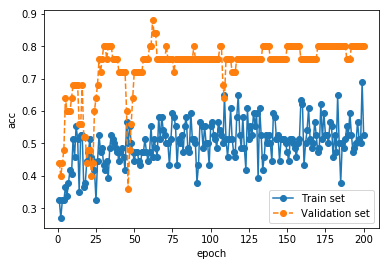

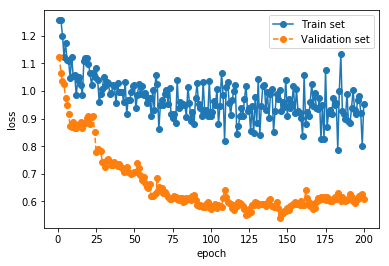

In [117]:
set_verbosity(ERROR)

time_summary = TimeSummary()
monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
#checkpoint= ModelCheckpoint(filepath="best_weights.hdf5",verbose=0,mode='auto',save_weights_only=True)


model = Iris_kaggle(x.shape[1],num_classes)
summary = model.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    callbacks=[time_summary,monitor],verbose=0,
                    batch_size=100,
                    epochs=20)

#model.load_weights('best_weights.hdf5')
score = model.evaluate(x_test,y_test)
print('final loss:', score[0])
print('final accuracy:', score[1])

print()
plot_training_summary(summary, time_summary)


In [ ]:
#ValueError: Parent directory of best_weights.hdf5 doesn't exist, can't save.

## secound model

In [108]:
def Iris_kaggle_2(inputshape,num_classes):
    model = Sequential()
 
    model.add(Dense(20,activation=relu))
  
    model.add(Dense(10, activation=relu))
   
    model.add(Dense(len(num_classes),activation=softmax, name="output_layer"))
    
    model.compile(loss= categorical_crossentropy, optimizer='Adam',metrics=['accuracy'])
    return model

25/25 [==============================] - 0s 34us/step
final loss: 0.004906997550278902
final accuracy: 1.0

Training time: 0:00:56.022050(HH:MM:SS)
Epoch time avg: 0:00:00.280076(HH:MM:SS)


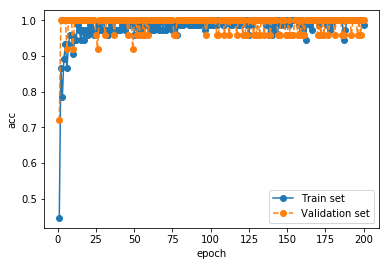

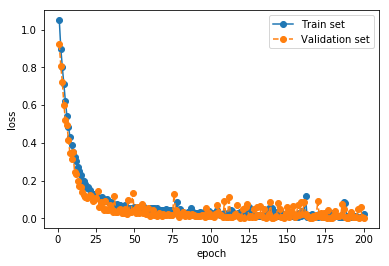

In [137]:
set_verbosity(ERROR)

time_summary = TimeSummary()
monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')



model2 = Iris_kaggle_2(x.shape[1],num_classes)
summary = model2.fit(x_train,y_train,
                    validation_data=(x_test,y_test),
                    callbacks=[time_summary,monitor],verbose=0,
                    batch_size=1,
                    epochs=200)

score = model2.evaluate(x_test,y_test)
print('final loss:', score[0])
print('final accuracy:', score[1])
print()
plot_training_summary(summary, time_summary)

In [125]:
pred = model2.predict(x_test)

In [127]:
print(pred[1])
print(y_test[1])

[1.2280925e-07 6.9163078e-03 9.9308360e-01]
[0. 0. 1.]


## save model 

In [122]:
#!touch model_save/network_Iris_kaggle_2.json
import os

In [123]:
# save neural network structure to JSON (no weights)
save_path= 'model_save'
model_json = model.to_json()
with open(os.path.join(save_path,"network_Iris_kaggle_2.json"), "w") as json_file:
    json_file.write(model_json)

In [ ]:
from tesnsorflow.keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))

## <font color="#A52A2A">Generate Kaggle submit file

In [ ]:
# Generate Kaggle submit file
# Encode feature vector
df_test = pd.read_csv(filename_test,na_values=['NA','?'])

encode_numeric_zscore(df_test,'petal_w')
encode_numeric_zscore(df_test,'petal_l')
encode_numeric_zscore(df_test,'sepal_w')
encode_numeric_zscore(df_test,'sepal_l')
ids = df_test['id']
df_test.drop('id', axis=1, inplace=True)

x = df_test.as_matrix().astype(np.float32)

# Generate predictions
pred = model.predict(x)
#pred

# Create submission data set

df_submit = pd.DataFrame(pred)
df_submit.insert(0,'id',ids)
df_submit.columns = ['id','species-0','species-1','species-2']

df_submit.to_csv(filename_submit, index=False)

print(df_submit)